### Data Description
#### Taken from https://www.kaggle.com/currie32/crimes-in-chicago
* ID - Unique identifier for the record.
* Case Number - The Chicago Police Department RD Number (Records Division Number), which is unique to the incident.
* Date - Date when the incident occurred. this is sometimes a best estimate.
* Block - The partially redacted address where the incident occurred, placing it on the same block as the actual address.
* IUCR - The Illinois Uniform Crime Reporting code. This is directly linked to the Primary Type and Description. See the list of IUCR codes at https://data.cityofchicago.org/d/c7ck-438e.
* Primary Type - The primary description of the IUCR code.
* Description - The secondary description of the IUCR code, a subcategory of the primary description.
* Location Description - Description of the location where the incident occurred.
* Arrest - Indicates whether an arrest was made.
* Domestic - Indicates whether the incident was domestic-related as defined by the Illinois Domestic Violence Act.
* Beat - Indicates the beat where the incident occurred. A beat is the smallest police geographic area â each beat has a dedicated police beat car. Three to five beats make up a police sector, and three sectors make up a police district. The Chicago Police Department has 22 police districts. See the beats at https://data.cityofchicago.org/d/aerh-rz74.
* District - Indicates the police district where the incident occurred. See the districts at https://data.cityofchicago.org/d/fthy-xz3r.
* Ward - The ward (City Council district) where the incident occurred. See the wards at https://data.cityofchicago.org/d/sp34-6z76.
* Community Area - Indicates the community area where the incident occurred. Chicago has 77 community areas. See the community areas at https://data.cityofchicago.org/d/cauq-8yn6.
* FBI Code - Indicates the crime classification as outlined in the FBI's National Incident-Based Reporting System (NIBRS). See the Chicago Police Department listing of these classifications at http://gis.chicagopolice.org/clearmap_crime_sums/crime_types.html.
* X Coordinate - The x coordinate of the location where the incident occurred in State Plane Illinois East NAD 1983 projection. This location is shifted from the actual location for partial redaction but falls on the same block.
* Y Coordinate - The y coordinate of the location where the incident occurred in State Plane Illinois East NAD 1983 projection. This location is shifted from the actual location for partial redaction but falls on the same block.
* Year - Year the incident occurred.
* Updated On - Date and time the record was last updated.
* Latitude - The latitude of the location where the incident occurred. This location is shifted from the actual location for partial redaction but falls on the same block.
* Longitude - The longitude of the location where the incident occurred. This location is shifted from the actual location for partial redaction but falls on the same block.
* Location - The location where the incident occurred in a format that allows for creation of maps and other geographic operations on this data portal. This location is shifted from the actual location for partial redaction but falls on the same block.

In [1]:
#import the dataset
library("AzureML")

ws <- workspace(
  id = "",
  auth = "",
  api_endpoint = "https://studioapi.azureml.net"
)
df <- download.datasets(
  dataset = ws,
  name = "chicagocrimes"
)


In [2]:
head(df)

X,ID,Case.Number,Date,Block,IUCR,Primary.Type,Description,Location.Description,Arrest,...,Ward,Community.Area,FBI.Code,X.Coordinate,Y.Coordinate,Year,Updated.On,Latitude,Longitude,Location
3,10508693,HZ250496,05/03/2016 11:40:00 PM,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,...,24,29,08B,1154907,1893681,2016,05/10/2016 03:56:50 PM,41.86407,-87.70682,"(41.864073157, -87.706818608)"
89,10508695,HZ250409,05/03/2016 09:40:00 PM,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,...,20,42,08B,1183066,1864330,2016,05/10/2016 03:56:50 PM,41.78292,-87.60436,"(41.782921527, -87.60436317)"
197,10508697,HZ250503,05/03/2016 11:31:00 PM,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,...,37,25,24,1140789,1904819,2016,05/10/2016 03:56:50 PM,41.89491,-87.75837,"(41.894908283, -87.758371958)"
673,10508698,HZ250424,05/03/2016 10:10:00 PM,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,...,28,25,08B,1143223,1901475,2016,05/10/2016 03:56:50 PM,41.88569,-87.74952,"(41.885686845, -87.749515983)"
911,10508699,HZ250455,05/03/2016 10:00:00 PM,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,...,28,25,06,1139890,1901675,2016,05/10/2016 03:56:50 PM,41.88630,-87.76175,"(41.886297242, -87.761750709)"
1108,10508702,HZ250447,05/03/2016 10:35:00 PM,082XX S MARYLAND AVE,041A,BATTERY,AGGRAVATED: HANDGUN,STREET,False,...,8,44,04B,1183336,1850642,2016,05/10/2016 03:56:50 PM,41.74535,-87.60380,"(41.745354023, -87.603798903)"


In [3]:
names(df)

[1] "X"                    "ID"                   "Case.Number"         
 [4] "Date"                 "Block"                "IUCR"                
 [7] "Primary.Type"         "Description"          "Location.Description"
[10] "Arrest"               "Domestic"             "Beat"                
[13] "District"             "Ward"                 "Community.Area"      
[16] "FBI.Code"             "X.Coordinate"         "Y.Coordinate"        
[19] "Year"                 "Updated.On"           "Latitude"            
[22] "Longitude"            "Location"

In [4]:
#X seems to be a row number of sorts, can be discarded
#Case.Number is as good as ID, can be discarded
#IUCR is same as Primary.Type and Description combined, can be discarded
#FBI.Code can be useful, seems like just another categorization, discarding for now
#X.Coordinate and Y.Coordinate are specific to State Plane Illinois East NAD 1983 projection system, discarding for now
#Updated.On isn't useful unless we're checking for follow-ups, hence discarding
#Location is the same as Latitude and Longitude together, cannot be used to replace missing values in the other two
sum(is.na(df["Location"]))
sum(is.na(df["Latitude"]))
sum(is.na(df["Longitude"]))
which(names(df) %in% c("X", "Case.Number", "IUCR", "FBI.Code", "X.Coordinate", "Y.Coordinate", "Updated.On", "Location"))


[1] 0

[1] 37083

[1] 37083

[1]  1  3  6 16 17 18 20 23

In [5]:
df1 <- cbind(df[,-c(1, 3, 6, 16, 17, 18, 20, 23)])

In [6]:
head(df1)

ID,Date,Block,Primary.Type,Description,Location.Description,Arrest,Domestic,Beat,District,Ward,Community.Area,Year,Latitude,Longitude
10508693,05/03/2016 11:40:00 PM,013XX S SAWYER AVE,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,1022,10,24,29,2016,41.86407,-87.70682
10508695,05/03/2016 09:40:00 PM,061XX S DREXEL AVE,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,313,3,20,42,2016,41.78292,-87.60436
10508697,05/03/2016 11:31:00 PM,053XX W CHICAGO AVE,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,False,1524,15,37,25,2016,41.89491,-87.75837
10508698,05/03/2016 10:10:00 PM,049XX W FULTON ST,BATTERY,SIMPLE,SIDEWALK,False,False,1532,15,28,25,2016,41.88569,-87.74952
10508699,05/03/2016 10:00:00 PM,003XX N LOTUS AVE,THEFT,$500 AND UNDER,RESIDENCE,False,True,1523,15,28,25,2016,41.88630,-87.76175
10508702,05/03/2016 10:35:00 PM,082XX S MARYLAND AVE,BATTERY,AGGRAVATED: HANDGUN,STREET,False,False,631,6,8,44,2016,41.74535,-87.60380


In [8]:
#check for missing values
library(stringr)
sum(is.na(df1[1]))
sum(is.na(df1[2]) | str_trim(df1[,2])=="")
sum(is.na(df1[3]) | str_trim(df1[,3])=="")
sum(is.na(df1[4]) | str_trim(df1[,4])=="")
sum(is.na(df1[5]) | str_trim(df1[,5])=="")
sum(is.na(df1[6]) | str_trim(df1[,6])=="")
sum(is.na(df1[7]) | str_trim(df1[,7])=="")
sum(is.na(df1[8]) | str_trim(df1[,8])=="")
sum(is.na(df1[9]))
sum(is.na(df1[10]))
sum(is.na(df1[11]))
sum(is.na(df1[12]))
sum(is.na(df1[13]))
sum(is.na(df1[14]) | is.na(df1[15]))

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 1658

[1] 0

[1] 0

[1] 0

[1] 1

[1] 14

[1] 40

[1] 0

[1] 37083

In [9]:
#drop the affected rows
df2 <- cbind(df1[str_trim(df1[,6])!="" & !(is.na(df1[10])) & !(is.na(df1[11])) & !(is.na(df1[12])) & !(is.na(df1[14])) & !(is.na(df1[15])),])


In [10]:
head(df2)

ID,Date,Block,Primary.Type,Description,Location.Description,Arrest,Domestic,Beat,District,Ward,Community.Area,Year,Latitude,Longitude
10508693,05/03/2016 11:40:00 PM,013XX S SAWYER AVE,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,1022,10,24,29,2016,41.86407,-87.70682
10508695,05/03/2016 09:40:00 PM,061XX S DREXEL AVE,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,313,3,20,42,2016,41.78292,-87.60436
10508697,05/03/2016 11:31:00 PM,053XX W CHICAGO AVE,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,False,1524,15,37,25,2016,41.89491,-87.75837
10508698,05/03/2016 10:10:00 PM,049XX W FULTON ST,BATTERY,SIMPLE,SIDEWALK,False,False,1532,15,28,25,2016,41.88569,-87.74952
10508699,05/03/2016 10:00:00 PM,003XX N LOTUS AVE,THEFT,$500 AND UNDER,RESIDENCE,False,True,1523,15,28,25,2016,41.88630,-87.76175
10508702,05/03/2016 10:35:00 PM,082XX S MARYLAND AVE,BATTERY,AGGRAVATED: HANDGUN,STREET,False,False,631,6,8,44,2016,41.74535,-87.60380


In [11]:
#making maps, reference - http://eriqande.github.io/rep-res-web/lectures/making-maps-with-R.html
install.packages(c("ggmap", "mapdata"))

Installing packages into '/home/nbcommon/R'
(as 'lib' is unspecified)
also installing the dependencies 'RJSONIO', 'RgoogleMaps', 'rjson', 'mapproj', 'jpeg', 'geosphere', 'maps'




The downloaded source packages are in
	'/tmp/RtmpIBsqdK/downloaded_packages'


In [12]:
library(ggplot2)
library(ggmap)
library(maps)
library(mapdata)

In [151]:
#reference - http://eriqande.github.io/rep-res-web/lectures/making-maps-with-R.html
#and http://alanzablocki.com/projects/chicago-crime-r/
locdf <- map_data("county")
locdf <- locdf[(locdf$region == "illinois") & (locdf$subregion == "cook"),]
locdf <- locdf[(locdf$long > -88) & (locdf$lat < 42.1) & (locdf$lat > 41.4),]
locdf

,long,lat,group,order,region,subregion
22189,-87.67400,42.06656,576,22189,illinois,cook
22190,-87.66254,42.04364,576,22190,illinois,cook
22191,-87.63963,41.99781,576,22191,illinois,cook
22192,-87.62817,41.94051,576,22192,illinois,cook
22193,-87.60525,41.85456,576,22193,illinois,cook
22194,-87.58233,41.78008,576,22194,illinois,cook
22195,-87.55368,41.75143,576,22195,illinois,cook
22196,-87.53076,41.73997,576,22196,illinois,cook
22197,-87.52503,41.46495,576,22197,illinois,cook
22198,-87.79432,41.46495,576,22198,illinois,cook


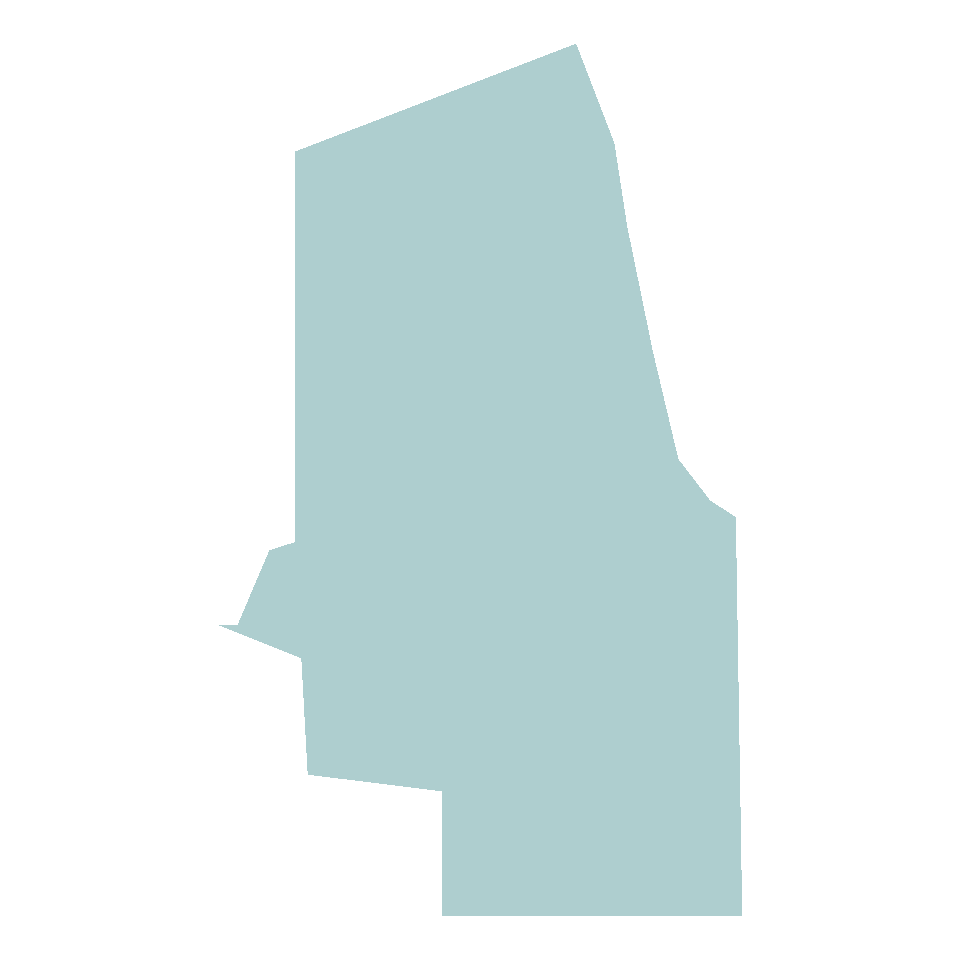

In [179]:
options(repr.plot.width=8, repr.plot.height=8)
citymap <- ggplot(data = locdf, mapping = aes(x = long, y = lat)) + coord_fixed(1.3) + geom_polygon(fill = "cadetblue", alpha = 0.5) + theme_nothing()
citymap

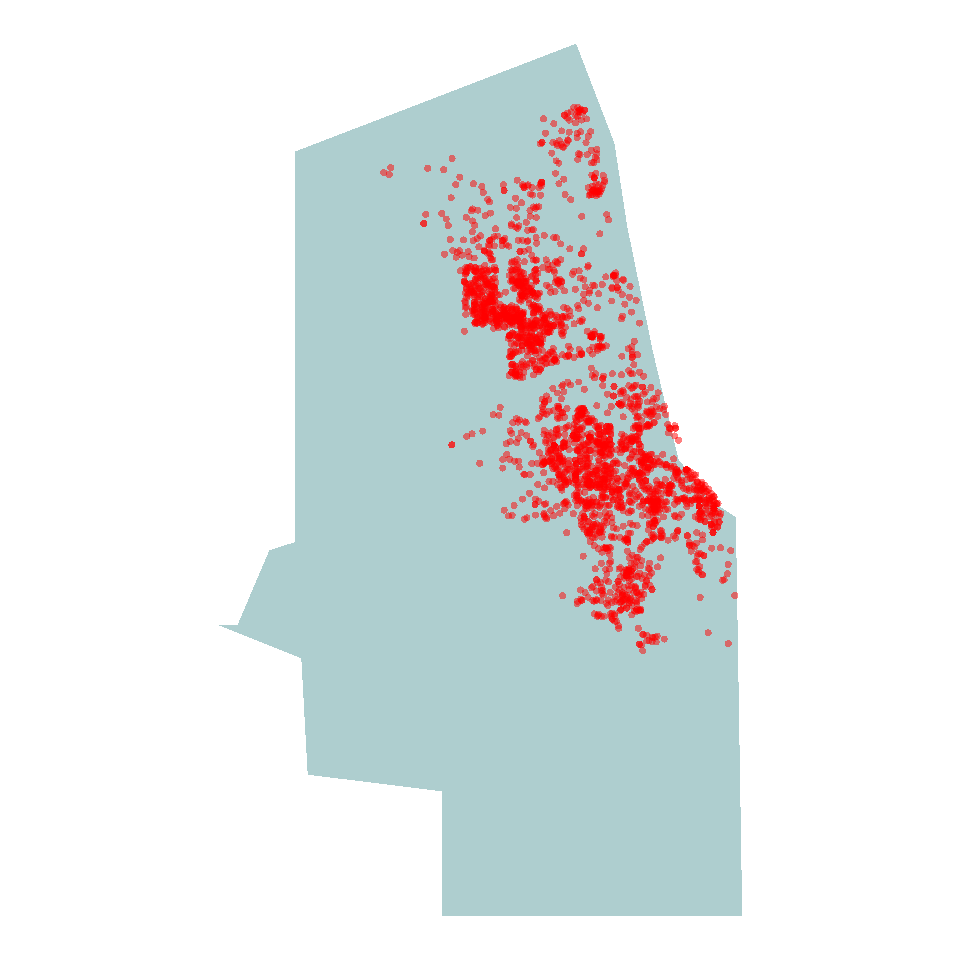

In [180]:
#only considering HOMICIDE data
homicide <- df2[df2$Primary.Type == "HOMICIDE",]
#putting the locations on the map
options(repr.plot.width=8, repr.plot.height=8)
citymap + geom_point(data = homicide, aes(x = Longitude, y = Latitude), color = "red", size = 2, alpha = 0.5)

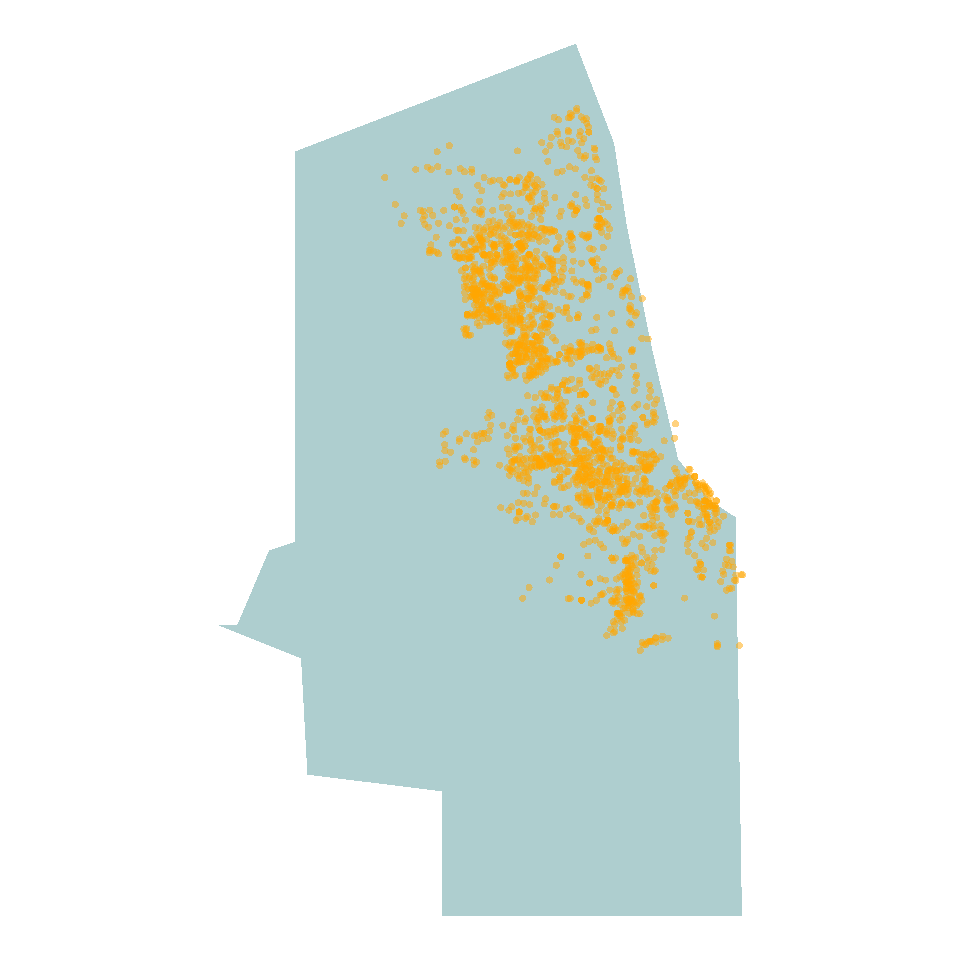

In [181]:
#only considering ARSON data
arson <- df2[df2$Primary.Type == "ARSON",]
#putting the locations on the map
options(repr.plot.width=8, repr.plot.height=8)
citymap + geom_point(data = arson, aes(x = Longitude, y = Latitude), color = "orange", size = 2, alpha = 0.5)

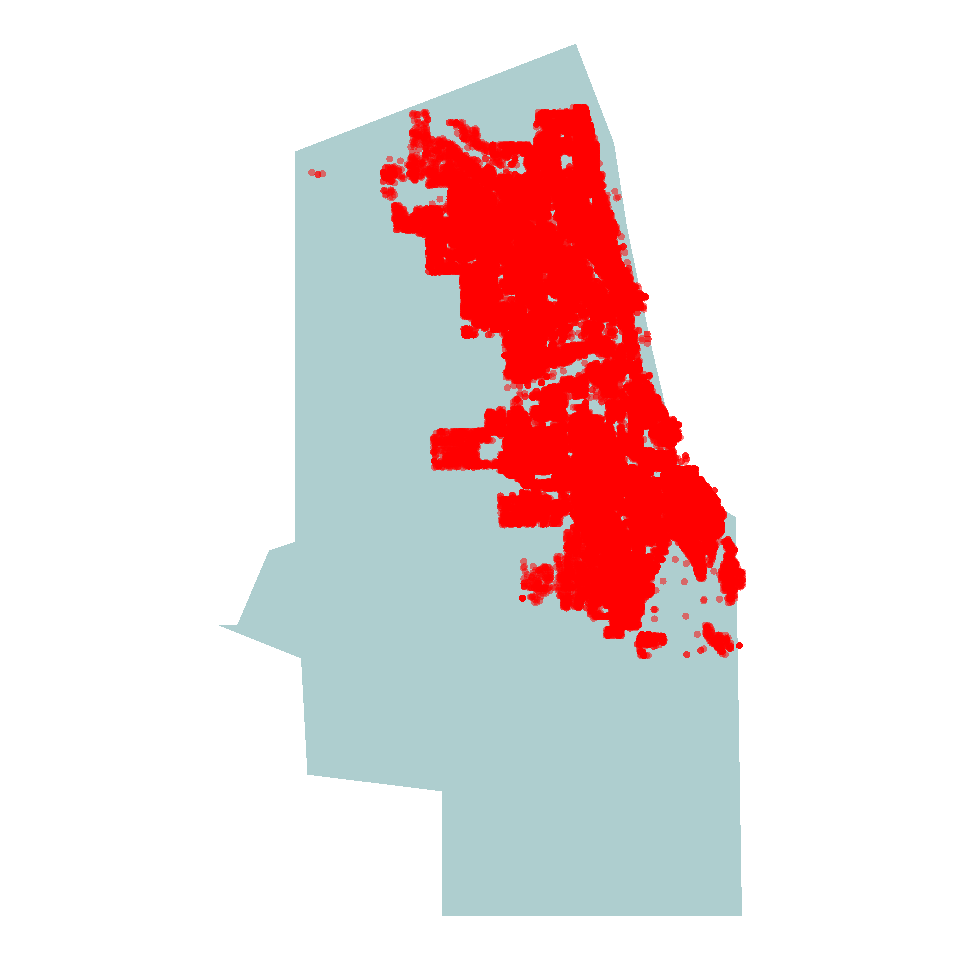

In [182]:
#only considering BURGLARY data
burglary <- df2[df2$Primary.Type == "BURGLARY",]
#getting rid of the outlier
burglary <- burglary[burglary$Longitude != min(burglary$Longitude),]
#putting the locations on the map
options(repr.plot.width=8, repr.plot.height=8)
citymap + geom_point(data = burglary, aes(x = Longitude, y = Latitude), color = "red", size = 2, alpha = 0.5)

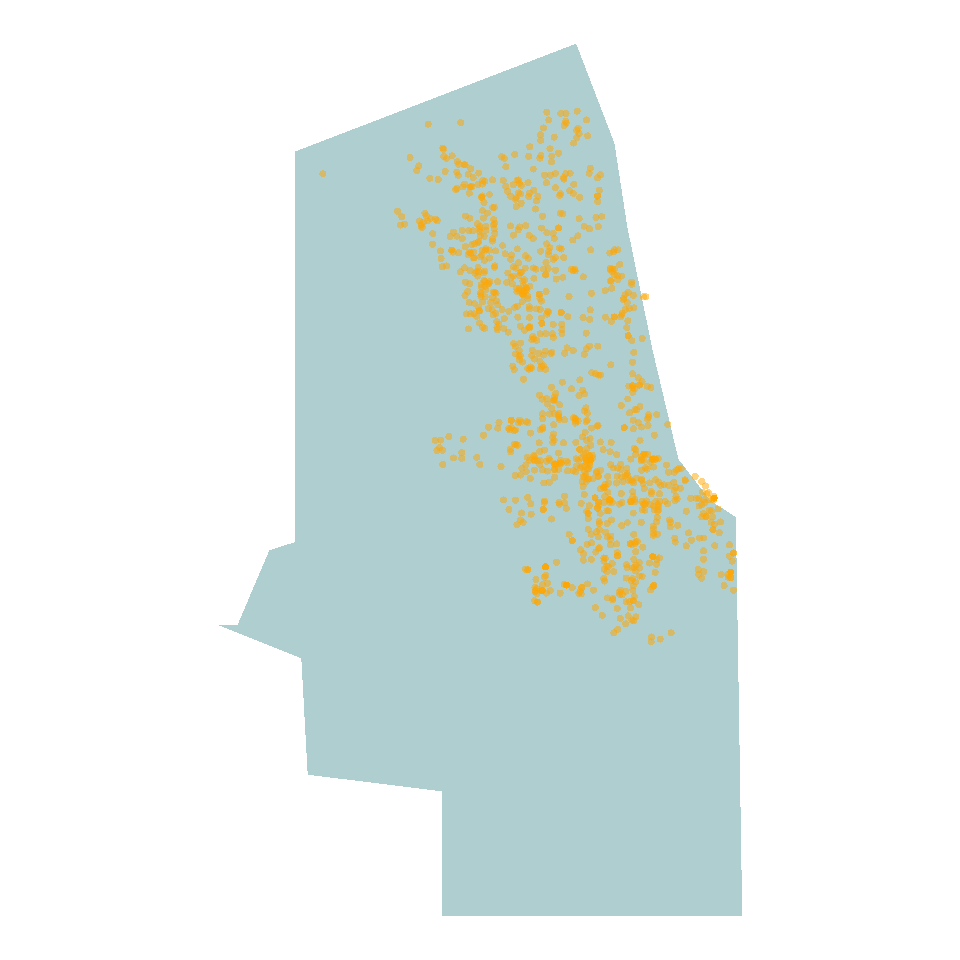

In [183]:
#only considering KIDNAPPING data
kidnap <- df2[df2$Primary.Type == "KIDNAPPING",]
#putting the locations on the map
options(repr.plot.width=8, repr.plot.height=8)
citymap + geom_point(data = kidnap, aes(x = Longitude, y = Latitude), color = "orange", size = 2, alpha = 0.5)

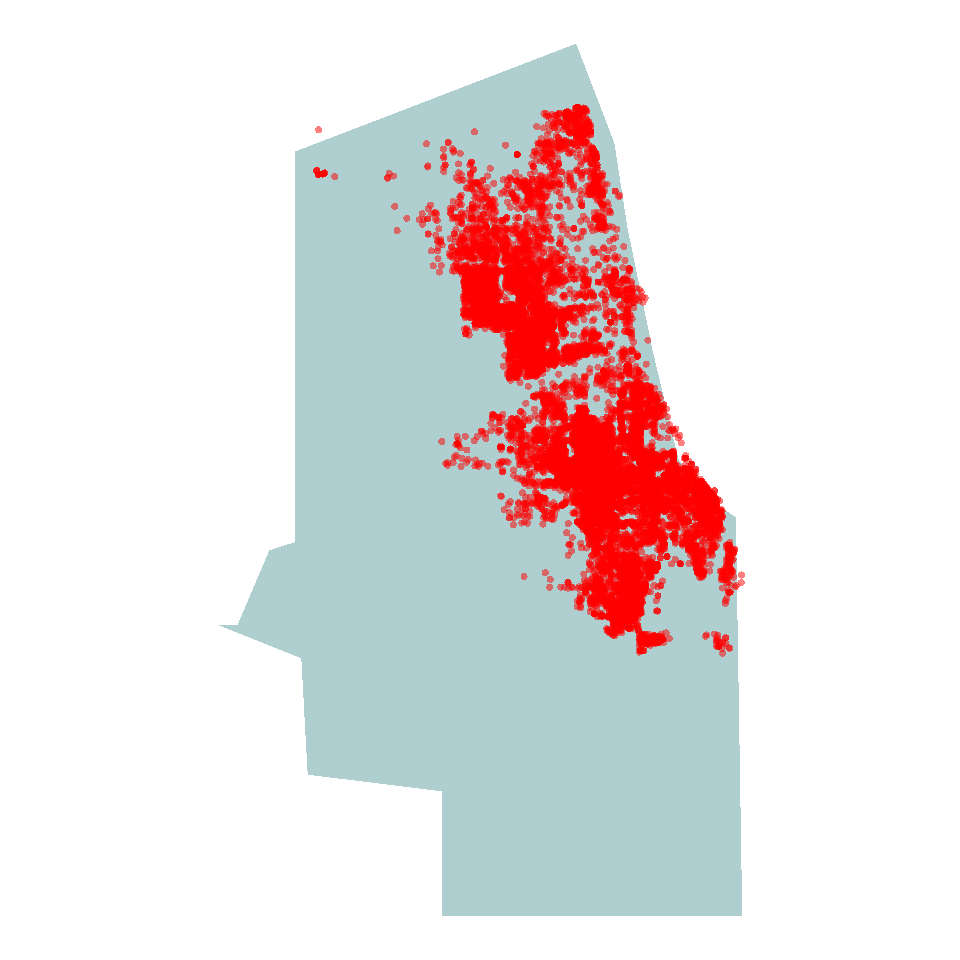

In [184]:
#only considering WEAPONS VIOLATION data
wepvio <- df2[df2$Primary.Type == "WEAPONS VIOLATION",]
#getting rid of the outlier
wepvio <- wepvio[wepvio$Longitude != min(wepvio$Longitude),]
#putting the locations on the map
options(repr.plot.width=8, repr.plot.height=8)
citymap + geom_point(data = wepvio, aes(x = Longitude, y = Latitude), color = "red", size = 2, alpha = 0.5)